# Tutorial 6.2. Advanced Topics on Extreme Value Analysis

### Description: Some advanced topics on Extreme Value Analysis are presented here. Some exercises are proposed. 

#### Students are advised to complete the exercises. 

Project: Structural Wind Engineering WS19-20 
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek
        
Author: anoop.kodakkal@tum.de, mate.pentek@tum.de

Created on:  24.12.2019

Last update: 24.12.2019

##### Contents:

 1. Prediction of the extreme value of a time series - MaxMin Estimation 
 2. Lieblein's BLUE method
 3. Cook & Mayne method

In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
#external files 
from peakpressure import maxminest
import blue4pressure

## 1. Prediction of the extreme value of a time series - MaxMin Estimation


#### this method is based on the procedure by  Sadek, F. and Simiu, E. (2002). "Peak non-gaussian wind effects for database-assisted low-rise building design." Journal of Engineering Mechanics, 128(5), 530-539.

INPUT ARGUMENTS:

Each row of "record" is a time series.
The optional input argument "dur_ratio" allows peaks to be estimated for
a duration that differs from the duration of the record itself:
   dur_ratio = [duration for peak estimation]/[duration of record]
   (If unspecified, a value of 1 is used.)

OUTPUT ARGUMENTS:

"max_est" gives the expected maximum values of each row of "record"

"min_est" gives the expected minimum values of each row of "record"

"max_std" gives the standard deviations of the maximum value for each row of "record"

"min_std" gives the standard deviations of the minimum value for each row of "record"



(array([[2.36535988]]), array([[-0.71199031]]), array([[0.06569003]]), array([[0.00299395]]))


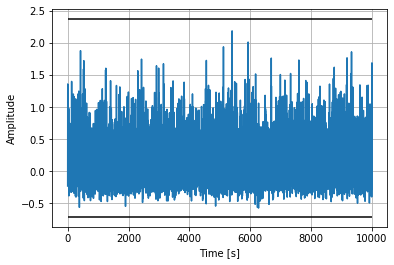

In [2]:
given_series = np.loadtxt('test_data_gevrnd.dat', skiprows=0, usecols = (0,))

# print results
result = maxminest(given_series)
print(result)
maxv = result[0][0][0]
minv = result[1][0][0]

###########

plt.figure()
x_series = np.arange(0.0, len(given_series), 1.0)
plt.plot(x_series, given_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.hlines([maxv, minv], x_series[0], x_series[-1])
plt.grid(True)
plt.show()

## 2. Lieblein's BLUE method

From a time series of pressure coefficients, blue4pressure estimates
extremes of positive and negative pressures based on Lieblein's BLUE 
(Best Linear Unbiased Estimate) method applied to n epochs. Extremes 
are estimated for 1 and dur epochs for probabilities of non-exceedance 
P1 and P2 of the Gumbel distribution fitted to the epochal peaks.
n = integer, dur need not be an integer.
Written by Dat Duthinh 8_25_2015, 2_2_2016, 2_6_2017
Reference: 1) Julius Lieblein "Efficient Methods of Extreme-Value
Methodology" NBSIR 74-602 OCT 1974 for n = 4:16
2) Nicholas John Cook "The designer's guide to wind loading of
building structures" part 1, British Research Establishment 1985 Table C3
pp. 321-323 for n = 17:24. Extension to n=100 by Adam Pintar Feb 12 2016.
3) INTERNATIONAL STANDARD, ISO 4354 (2009-06-01), 2nd edition, “Wind 
actions on structures,” Annex D (informative) “Aerodynamic pressure and 
force coefficients,” Geneva, Switzerland, p. 22

INPUT 

    cp = vector of time history of pressure coefficients
    n = number of epochs (integer)of cp data, 4 <= n <= 100
    dur = number of epochs for estimation of extremes. Default dur = n
    dur need not be an integer
    P1, P2 = probabilities of non-exceedance of extremes in EV1 (Gumbel).  
    P1 defaults to 0.80 (ISO)and P2 to 0.5704 (mean).
    OUTPUT 
    suffix max for + peaks, min for - peaks of pressure coeff.
    p1_max (p1_min)= extreme value of positive (negative) peaks with
    probability of non-exceedance P1 for 1 epoch
    p2_max (p2_min)= extreme value of positive (negative) peaks with
    probability of exceedance P2 for 1 epoch
    p1_rmax (p1_rmin)= extreme value of positive (negative) peaks with
    probability of non-exceedance P1 for dur epochs
    p2_rmax (p2_rmin)= extreme value of positive (negative) peaks with
    probability of non-exceedance P2 for for dur epochs
    cp_max (cp_min)= vector of n positive (negative) epochal peaks
    u_max, b_max (u_min, b_min) = location and scale parameters of EV1
    (Gumbel) for positive (negative) peaks

    

In [3]:
# n = number of epochs (integer)of cp data, 4 <= n <= 100
n=4
# P1, P2 = probabilities of non-exceedance of extremes in EV1 (Gumbel).
P1=0
P2=0
# dur = number of epochs for estimation of extremes. Default dur = n
# dur need not be an integer
dur=1

# Call function
blue4pressure.blue4pressure(given_series, n, P1, P2, dur)

[2.055273] [1.90774418] [2.055273] [1.90774418] [1.81543718] [0.15989694] [[1.87586206]
 [1.72402753]
 [2.18395094]
 [1.85755886]] [-0.58155003] [-0.54702214] [-0.58155003] [-0.54702214] [-0.52541846] [0.03742255] [[-0.56314757]
 [-0.54340338]
 [-0.57407024]
 [-0.4979849 ]]


(array([2.055273]),
 array([1.90774418]),
 array([2.055273]),
 array([1.90774418]),
 array([1.81543718]),
 array([0.15989694]),
 array([[1.87586206],
        [1.72402753],
        [2.18395094],
        [1.85755886]]),
 array([-0.58155003]),
 array([-0.54702214]),
 array([-0.58155003]),
 array([-0.54702214]),
 array([-0.52541846]),
 array([0.03742255]),
 array([[-0.56314757],
        [-0.54340338],
        [-0.57407024],
        [-0.4979849 ]]))

## 2.  3. Cook & Mayne method 

#### Discuss among groups the advanced extreme value evaluation methods